In [87]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# load dataset
df = pd.read_csv("cleve.mod", sep = "\s+", header=None)
df.columns = ["age", "sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","bs","class"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  bs        303 non-null    object 
 14  class     303 non-null    object 
dtypes: float64(5), object(10)
memory usage: 35.6+ KB


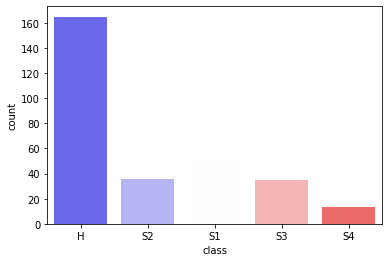

In [88]:
import seaborn as sns
df["class"].value_counts()
sns.countplot(x="class", data=df, palette="bwr")
plt.show()

In [63]:
df.isna().sum()
l1 = LabelEncoder()
df = df.apply(l1.fit_transform)
print(df.shape)

# Feature Importance with Extra Trees Classifier
array = df.values
X = df.iloc[:,0:14]
Y = df.iloc[:,14]
print(X.shape)




(303, 15)
(303, 14)


[0.23027403 0.11246832 0.08825135]


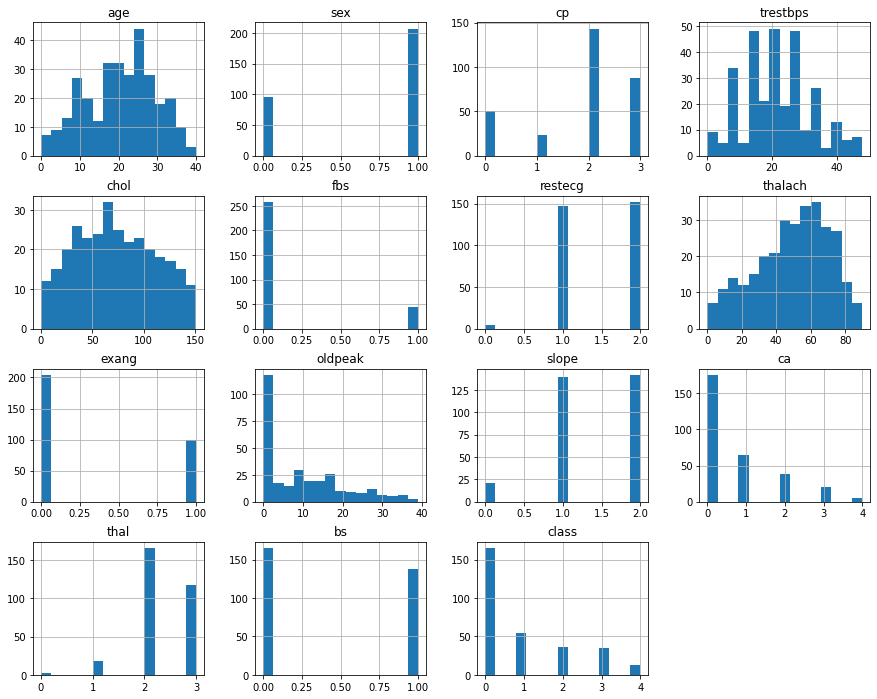

In [64]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

Text(0.5, 1.0, 'Correlation between different features from the dataset')

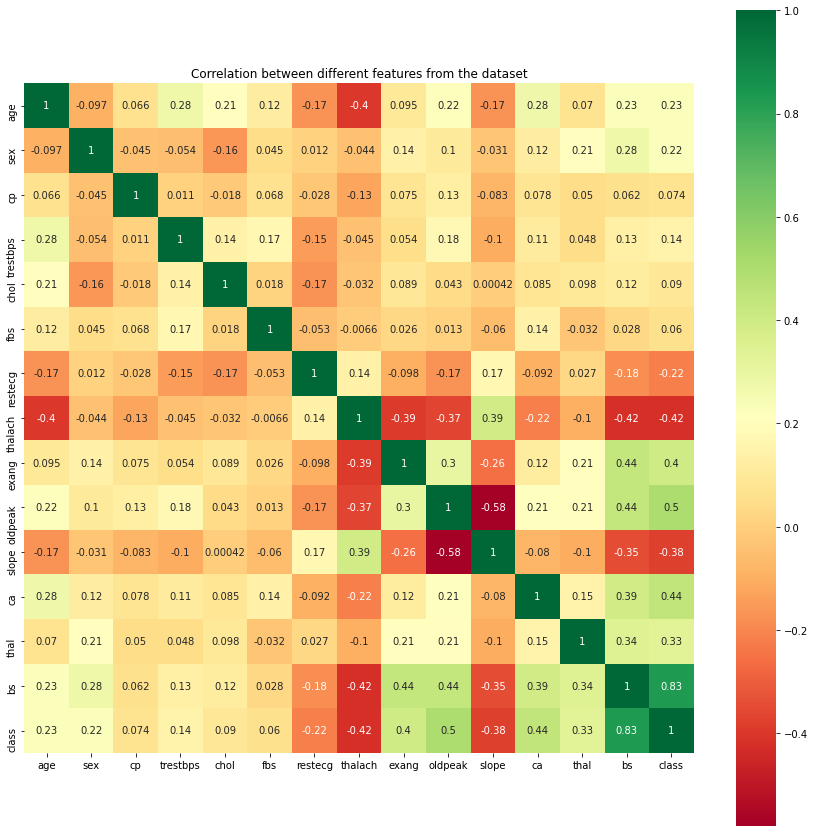

In [65]:
import seaborn as sns

correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='RdYlGn')

plt.title('Correlation between different features from the dataset')

[0.23027403 0.11246832 0.08825135 0.07560484 0.07355844 0.06885658
 0.06166964 0.05794659 0.05580216 0.04607893 0.04179615 0.03097125
 0.02855297 0.02816874]


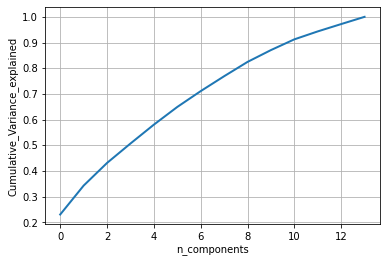

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA feature selection
from sklearn.decomposition import PCA
pca = PCA(n_components = 14)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [49]:

import plotly.express as px
n_components=4
pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=df["class"],
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [26]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 1.02683456e+00 -8.84960318e-02  1.16496719e+00]
 [ 3.19209526e-02 -5.37350183e-01  6.41417146e-01]
 [ 5.21856050e-01 -7.65040353e-01 -1.07740335e+00]
 [-6.88810861e-01 -4.07513252e-01 -1.96855907e+00]
 [-7.92503074e-01 -2.46808553e-01 -1.35415229e+00]
 [-5.13493631e-01 -1.86537576e+00  6.23305514e-01]
 [ 1.32871523e+00 -9.19927326e-01  9.69205064e-01]
 [ 1.59695201e+00  1.41871647e+00  9.98382741e-01]
 [-9.42985968e-01  2.38779984e-01  2.91154818e-01]
 [-6.93542022e-01 -3.08025925e-01 -1.90506151e+00]
 [-5.67943721e-01 -8.11563714e-01  4.78791417e-01]
 [ 1.01741734e+00  7.94037686e-01  8.50110201e-01]
 [-7.33764949e-01 -8.19776655e-01  1.47226229e+00]
 [-1.08619902e+00  2.71502873e-01  1.20606294e+00]
 [-1.58676862e-01  6.37517957e-01  1.15140188e+00]
 [-1.19135721e+00  4.70276378e-01 -5.43801449e-01]
 [-2.79072554e-01  1.02232890e+00  1.88058411e-01]
 [-3.78012069e-01  2.46027824e+00  1.43256966e+00]
 [ 1.22242994e+00  4.96682361e-01 -7.67580747e-01]
 [ 1.33409493e+00  1.67001270e+

variance: [6.66758616e-01 2.14164873e-01 5.59467899e-02 3.91668241e-02
 2.24255464e-02 4.47691788e-04 4.22054679e-04 1.81195465e-04
 1.29461286e-04 1.04435223e-04 7.98108894e-05 7.40970439e-05
 5.29085355e-05 4.56954741e-05]


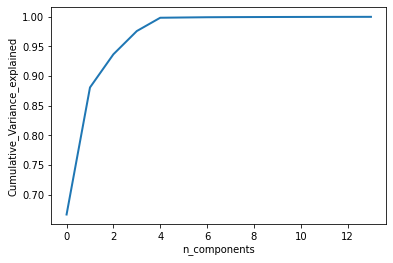

In [82]:
from sklearn.model_selection import train_test_split

# Applying PCA feature selection
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
pca = PCA(n_components = 14)
X_train = pca.fit_transform(X_train)
var = pca.explained_variance_ratio_;  
print("variance:", var)
cum_var=np.cumsum(var)

#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var,linewidth=2)  
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()